In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [10]:
df = pd.read_csv("C:/Users/Polatoglu3/Downloads/netflix daily top 10.csv")

In [9]:
print(df.shape)

(7100, 10)


In [11]:
print(df.columns)

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')


In [12]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [14]:
print(df.isnull().sum())

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64


In [16]:
df.fillna("No", inplace=True)

In [19]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

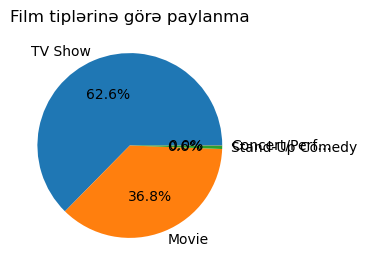

In [33]:
#5. Film tiplərinin paylanması (Movie / TV Show) 
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3,3))
plt.title("Film tiplərinə görə paylanma")
plt.ylabel("")
plt.show()
          

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


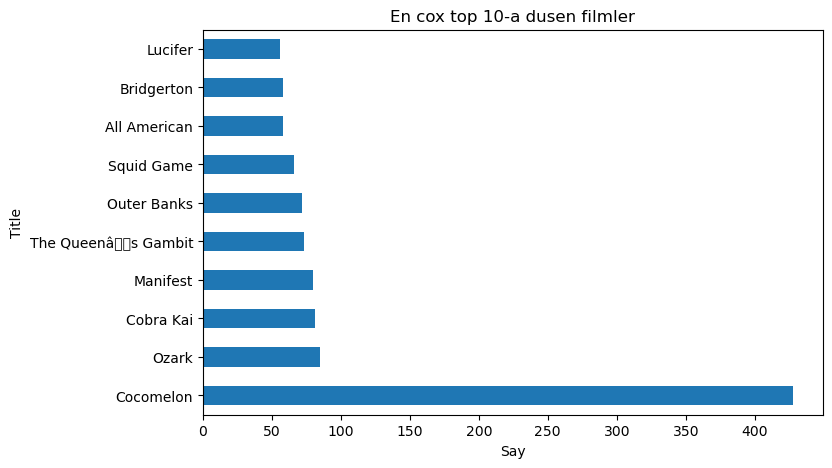

In [30]:
#6.En cox top 10-na dusen filmler
df['Title'].value_counts().head(10).plot(kind='barh',figsize=(8,5))
plt.title("En cox top 10-a dusen filmler")
plt.xlabel("Say")
plt.show()

C:\Users\Polatoglu3\AppData\Local\Temp\ipykernel_12840\3476879103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Rank', y='Title', palette="viridis")


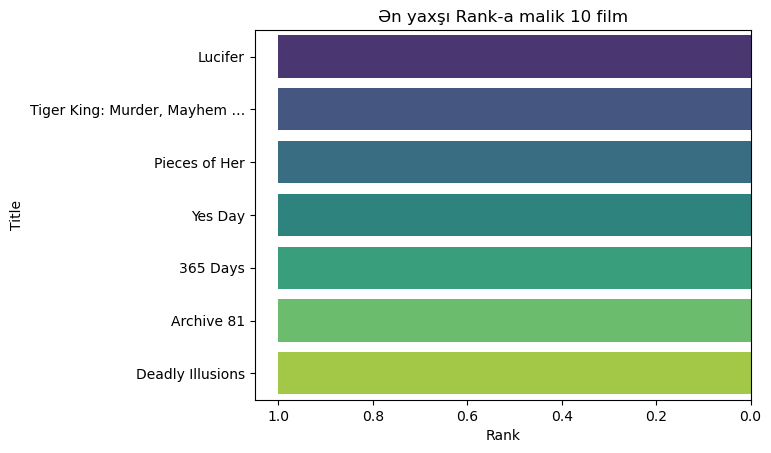

In [36]:
#7.İstifadəçi reytinqinə görə ən yaxşı 10 film
top10 = df.sort_values(by='Rank', ascending=True).head(10)
sns.barplot(data=top10, x='Rank', y='Title', palette="viridis")
plt.title("Ən yaxşı Rank-a malik 10 film")
plt.gca().invert_xaxis()
plt.show()

In [39]:
#8.Ən cox 1-ci yerde olan film
df_rank1 = df[df['Rank'] == 1]
print("Ən çox 1-ci yerdə olan film:")
print(df_rank1['Title'].value_counts().head(1))

Ən çox 1-ci yerdə olan film:
Title
Cobra Kai    27
Name: count, dtype: int64


In [45]:
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

In [46]:
#9.Neçə fərqli gün üzrə ölçülüb?
if 'Netflix Release Date' in df.columns:
    print("Unikal gun sayi:", df['Netflix Release Date'].dt.date.nunique())

Unikal gun sayi: 414


In [48]:
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


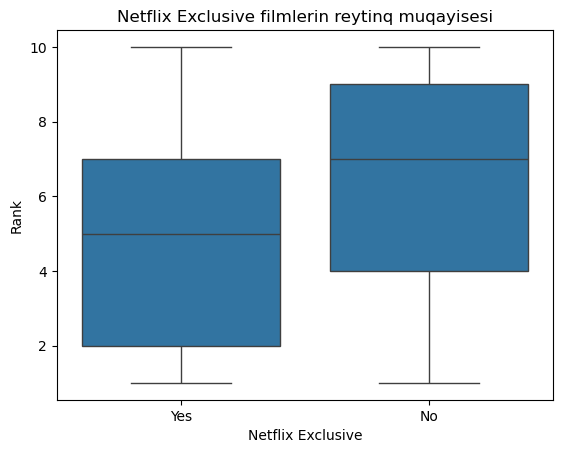

In [50]:
#10.Netflix Exclusive muqayisesi
if 'Netflix Exclusive' in df.columns:
    sns.boxplot(data=df,x='Netflix Exclusive',y='Rank')
    plt.title('Netflix Exclusive filmlerin reytinq muqayisesi')
    plt.show()

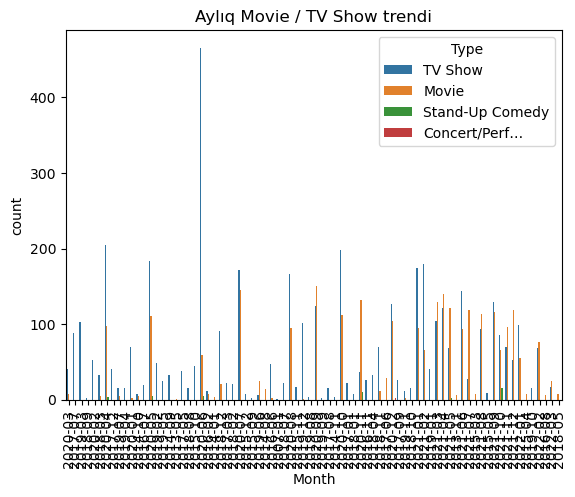

In [59]:
#11.Aylıq trend (Movie və TV Show)
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['Month'] = df['Netflix Release Date'].dt.to_period('M')
sns.countplot(data=df,x='Month',hue='Type')
plt.xticks(rotation=90)
plt.title("Aylıq Movie / TV Show trendi")
plt.show()

<bound method DataFrame.corr of       Year  Rank
0     2020     1
1     2017     2
2     2019     3
3     2020     4
4     2020     5
...    ...   ...
7095  2022     6
7096  2022     7
7097  2014     8
7098  2022     9
7099  2018    10

[7100 rows x 2 columns]>


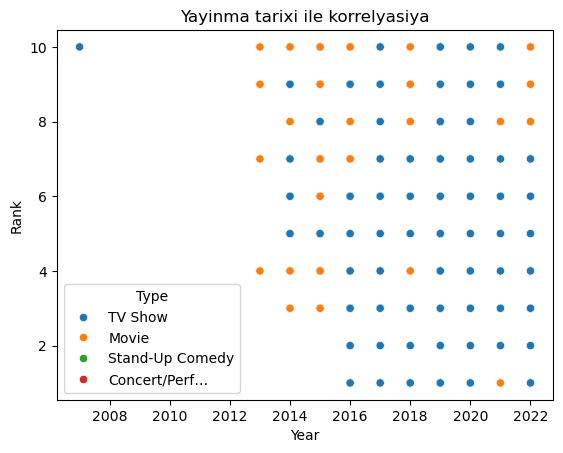

In [61]:
#12.Yayinma tarixi ile korrelyasiya
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['Year'] = df['Netflix Release Date'].dt.year
corr = df[['Year','Rank']].corr
print(corr)
sns.scatterplot(data=df,x="Year",y="Rank",hue="Type")
plt.title("Yayinma tarixi ile korrelyasiya")
plt.show()
    

In [67]:
#13.Aylara görə ən məşhur filmlər
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['Month_num'] = df['Netflix Release Date'].dt.month
popular_by_month = df.groupby('Month_num')['Title'].agg(lambda x: x.value_counts().index[0])
print(popular_by_month)

Month_num
1            The Circle US
2          Ginny & Georgia
3             All American
4              Outer Banks
5          Sweet Magnolias
6                Cocomelon
7                    Ozark
8                Cobra Kai
9               Squid Game
10    The Queenâs Gambit
11       The Queen of Flow
12              Bridgerton
Name: Title, dtype: object


In [70]:
#14.Rüblərə görə ən yüksək reytinqli filmlər
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['Quarter'] = df['Netflix Release Date'].dt.quarter
top5_quarter = df.groupby('Quarter').apply(lambda x: x.nlargest(5, 'Rank'))
print(top5_quarter[['Quarter', 'Title', 'Rank']])

             Quarter                         Title  Rank
Quarter                                                 
1       9          1                      Uncorked    10
        29         1                  Blood Father    10
        49         1                    Unorthodox    10
        109        1                    Nailed It!    10
        269        1  Tiger King: Murder, Mayhem …    10
2       39         2              The Players Club    10
        69         2                      Legacies    10
        99         2                     Community    10
        119        2                     Community    10
        129        2                The Main Event    10
3       19         3   Car Masters: Rust to Riches    10
        59         3                  The Hangover    10
        79         3                  The Hangover    10
        89         3                  The Hangover    10
        329        3              The Last Kingdom    10
4       179        4           

C:\Users\Polatoglu3\AppData\Local\Temp\ipykernel_12840\1321720645.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_quarter = df.groupby('Quarter').apply(lambda x: x.nlargest(5, 'Rank'))


C:\Users\Polatoglu3\AppData\Local\Temp\ipykernel_12840\717000784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Polatoglu3\AppData\Local\Temp\ipykernel_12840\717000784.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig

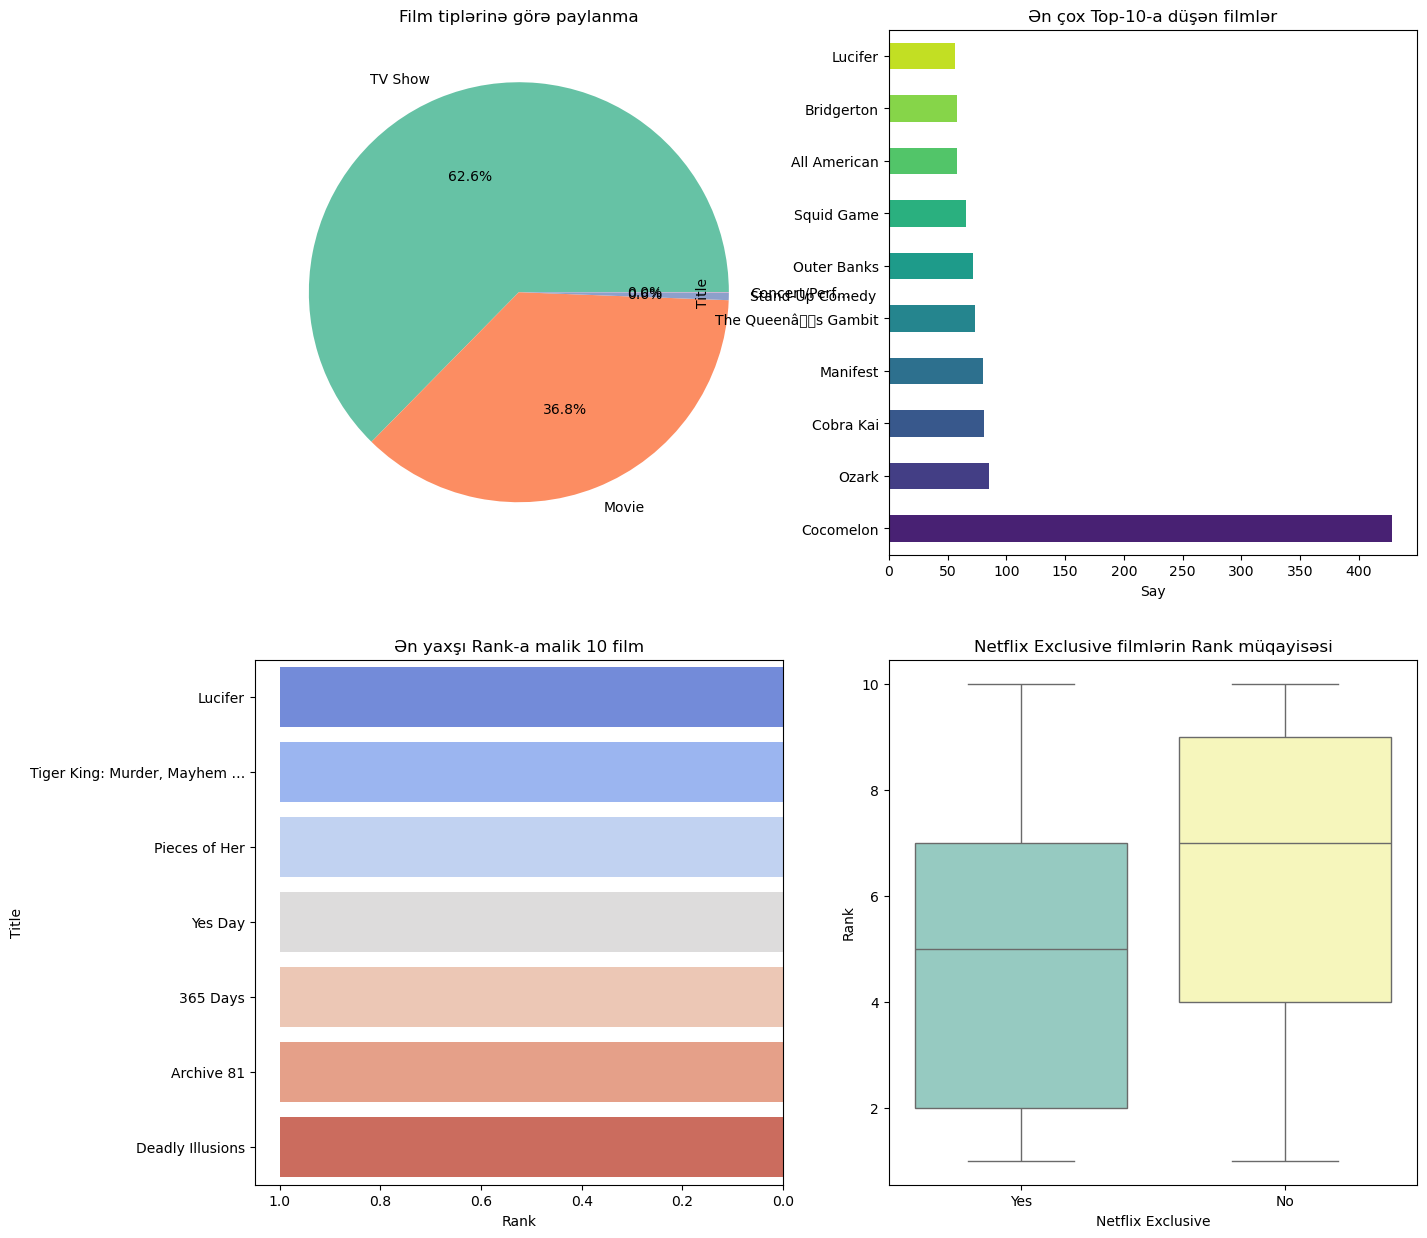

In [79]:
#15.Dashboard 
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs = plt.subplots(2,2, figsize=(15,15))
df['Type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axs[0,0],
    ylabel="",
    colors=sns.color_palette("Set2")
)
axs[0,0].set_title("Film tiplərinə görə paylanma")
df['Title'].value_counts().head(10).plot(
    kind='barh',
    ax=axs[0,1],
    color=sns.color_palette("viridis", 10)
)
axs[0,1].set_title("Ən çox Top-10-a düşən filmlər")
axs[0,1].set_xlabel("Say")
top10 = df.sort_values(by="Rank", ascending=True).head(10)
sns.barplot(
    data=top10,
    x="Rank",
    y="Title",
    ax=axs[1,0],
    palette="coolwarm"
)
axs[1,0].set_title("Ən yaxşı Rank-a malik 10 film")
axs[1,0].invert_xaxis()  # kiçik rank = daha yaxşı

if 'Netflix Exclusive' in df.columns:
    sns.boxplot(
        data=df,
        x="Netflix Exclusive",
        y="Rank",
        ax=axs[1,1],
        palette="Set3"
    )
    axs[1,1].set_title("Netflix Exclusive filmlərin Rank müqayisəsi")
